In [1]:
import urllib

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from trains import Task
task = Task.init(project_name="examples", task_name='magic_logging', output_uri='s3://allegro-tutorials/ComputerVision')

TRAINS Task: created new task id=fbb97983f9144ece8911acd17f6d956b
TRAINS results page: https://app.allegro.ai/projects/d641804f347140d5ba9add06d2a1e3b8/experiments/fbb97983f9144ece8911acd17f6d956b/output/log


In [3]:
task.get_logger().set_default_upload_destination('s3://allegro-tutorials/ComputerVision')

In [4]:
task_params = {
    # Plots
    'num_scatter_samples': 60, 'sin_max_value': 20, 'sin_steps': 30,
    # Mnist MLP
    'batch_size': 128, 'nb_classes': 10, 'nb_epoch': 2, 'hidden_dim':512
}
task_params = task.connect(task_params)

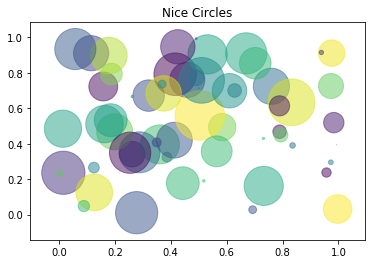

In [5]:
N = task_params['num_scatter_samples']
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (50 * np.random.rand(N))**2  # 0 to 15 point radii
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Nice Circles')
plt.show()

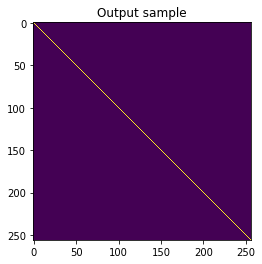

In [6]:
# Sample of output
m = np.eye(256, 256, dtype=np.uint8)
plt.imshow(m)
plt.title('Output sample')
plt.show()

### Train an MNIST MLP

In [7]:
batch_size = task_params['batch_size']
nb_classes = task_params['nb_classes']
nb_epoch = task_params['nb_epoch']


# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

hidden_dim = task_params['hidden_dim']
model = Sequential()
model.add(Dense(hidden_dim, input_shape=(784,)))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(hidden_dim))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

board = TensorBoard(histogram_freq=1, log_dir='/tmp/histogram_example')
model_store = ModelCheckpoint(filepath='./weight.{epoch}.hdf5')


history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    callbacks=[board, model_store],
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________________________